<a href="https://colab.research.google.com/github/kankitakahiro/kikaizemi/blob/main/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#repeadノード
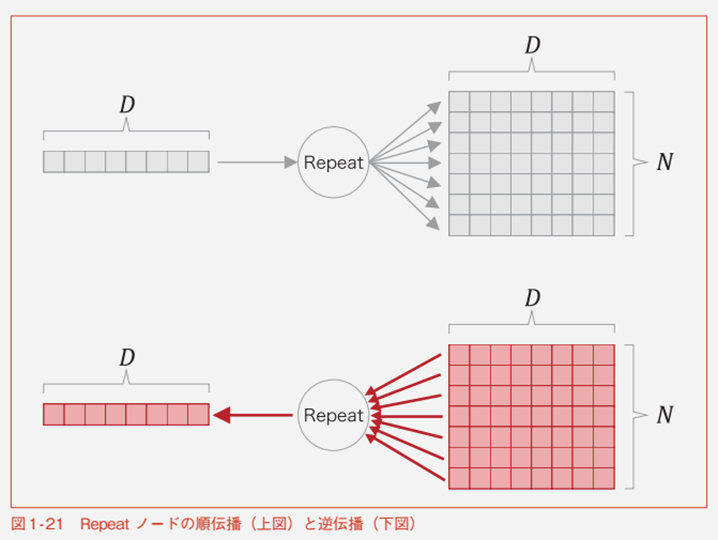

In [ ]:
import numpy as np

D, N = 8, 7
# 順伝播
x = np.random.randn(1, D)  # 入力
y = np.repeat(x, N, axis=0) # axisでどの軸方向に複製するかを指定
print('x', x)
print('y', y)

# 逆伝播
dy = np.random.randn(N,D)
dx = np.sum(dy, axis=0, keepdims=True) # keepdismで次元数を維持
# dx = np.sum(dy, axis=0, keepdims=False)
sum0 = 0

for i in range(N):
  sum0 = dy[i][0] + sum0

print(sum0)
print('dy', dy)
print('dx', dx)

x [[-0.88960967 -0.54342116 -0.29117487 -0.03518435 -0.13611168 -0.08541951
  -0.71703773  0.89578251]]
y [[-0.88960967 -0.54342116 -0.29117487 -0.03518435 -0.13611168 -0.08541951
  -0.71703773  0.89578251]
 [-0.88960967 -0.54342116 -0.29117487 -0.03518435 -0.13611168 -0.08541951
  -0.71703773  0.89578251]
 [-0.88960967 -0.54342116 -0.29117487 -0.03518435 -0.13611168 -0.08541951
  -0.71703773  0.89578251]
 [-0.88960967 -0.54342116 -0.29117487 -0.03518435 -0.13611168 -0.08541951
  -0.71703773  0.89578251]
 [-0.88960967 -0.54342116 -0.29117487 -0.03518435 -0.13611168 -0.08541951
  -0.71703773  0.89578251]
 [-0.88960967 -0.54342116 -0.29117487 -0.03518435 -0.13611168 -0.08541951
  -0.71703773  0.89578251]
 [-0.88960967 -0.54342116 -0.29117487 -0.03518435 -0.13611168 -0.08541951
  -0.71703773  0.89578251]]
-1.083587204259291
dy [[ 0.52311054 -0.58214804 -0.62881127  0.5568703   1.50685245  0.37612306
  -1.64539432 -0.91409823]
 [-0.52844884  0.07468512  0.3590838   0.33713811 -0.74807518  

#SUMノード
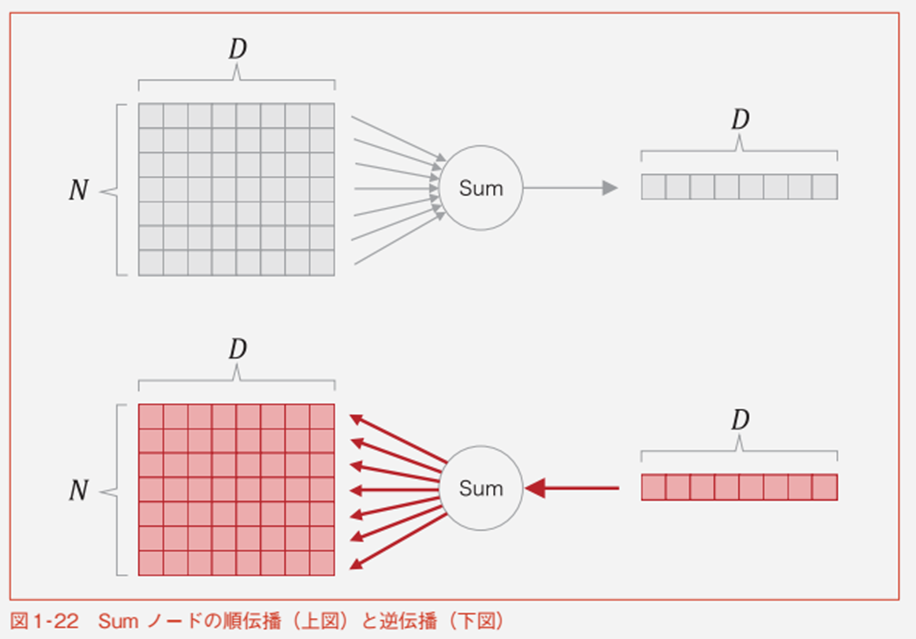

In [ ]:
D, N = 8, 7
# 順伝播
x = np.random.randn(N, D)  # 入力
y = np.sum(x, axis=0, keepdims = True)
print('x', x)
print('y', y)
#逆伝播
dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis=0)
print('dy', dy)
print('dx', dx)

x [[-2.37327485 -0.2377958  -0.97897689  0.64004308  0.344536    0.33354796
   1.72822252 -1.67669502]
 [ 0.52839365 -1.418854    0.98390142  0.99820454  1.32225275  0.66216463
   0.77268104 -1.17428605]
 [-0.20301728 -0.6145014  -1.1187089   1.73096826 -0.12035467 -1.28651611
  -1.09935085 -0.63668036]
 [-0.01869848  0.03764637  1.0755176  -1.75592945 -0.42186903 -1.45790887
  -1.03890098  0.15277834]
 [-0.93031293  0.18241441  1.18007173  2.10200039  0.15678312  0.68796211
   1.83782495 -0.12877148]
 [ 0.34431852  1.71818922 -1.37146716  0.47840134 -0.89294533 -1.17393822
   2.06150565  0.10026989]
 [ 0.64633549  0.04165972  0.0408575   1.66690303 -1.08892884  0.03038569
  -1.52613952 -0.38459983]]
y [[-2.00625588 -0.29124148 -0.1888047   5.8605912  -0.70052599 -2.20430282
   2.73584281 -3.74798451]]
dy [[ 0.18297165 -1.06470074  0.35449639 -1.599306    1.68347361  1.05816879
  -0.89807165  0.03186185]]
dx [[ 0.18297165 -1.06470074  0.35449639 -1.599306    1.68347361  1.05816879
  -0

#MatMulノード
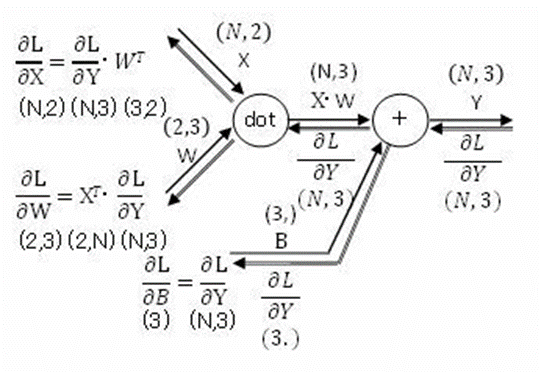

In [ ]:
class MatMul:
    def __init__(self, W):
        self.params = [W]                 #学習するパレメーターを保持
        self.grads = [np.zeros_like(W)]   #勾配を保持
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)                #内積の計算
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)            #内積の計算
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW           #3点リーダー
        return 
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)
# 順伝搬
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
print(W_in)
print(W_out)
print(s)

[[ 1.93259151 -0.05775467  0.27470019]
 [-0.22987647 -1.37430507 -0.31093536]
 [-1.15552801  0.42043362  0.65014471]
 [ 0.18673295  1.34158565 -0.35383297]
 [ 0.20256051  1.12627145  0.20146331]
 [ 0.15057722  1.51673204 -0.0431621 ]
 [-0.89600705  1.97181724  0.46373289]]
[[-2.44434534 -0.24432922  0.24554922  1.33422057 -0.40485122  0.60551271
   0.75470438]
 [ 0.70404319 -1.02305568 -1.44023342 -1.54289994  0.33182619 -0.22775865
  -0.74651411]
 [-0.67239644 -0.01233667 -0.15073356 -0.98496545  0.29782071  1.34690223
  -0.4908284 ]]
[[-1.13296616 -0.2861548  -0.23547009 -0.21687175  0.04059462  0.81679711
  -0.06911594]]


#三点リーダー
三点リーダーを用いることで変数のメモリアドレスを固定することができる.  
　 a　　　b  
[1,2,3,～,4,5,6]  
###a = bを実行
###従来
　　　　a,b  
[1,2,3,～,4,5,6]
###三点リーダー
　 a　　　b  
[4,5,6,～,4,5,6]

In [ ]:
# 浅いコピー
A = np.ones((2,3))
B = np.zeros((2,3))
print(A)
print(B)
B = A
B *= 2
print(A) #  Aが書き変わる


[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[2. 2. 2.]
 [2. 2. 2.]]


In [ ]:
# 深いコピー
A = np.ones((2,3))
B = np.zeros((2,3))
print(A)
print(B)
B[...] = A
B *= 2
print(A) # Aが書き換わらない


[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


#シグモイドレイヤ
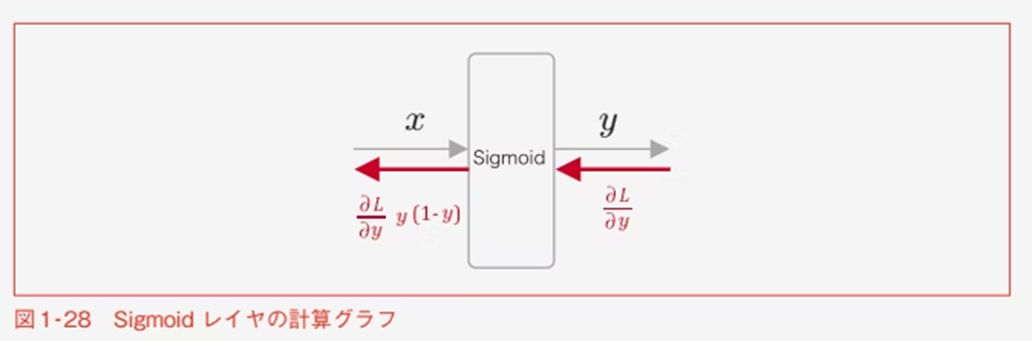

In [ ]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

#Affineレイヤ
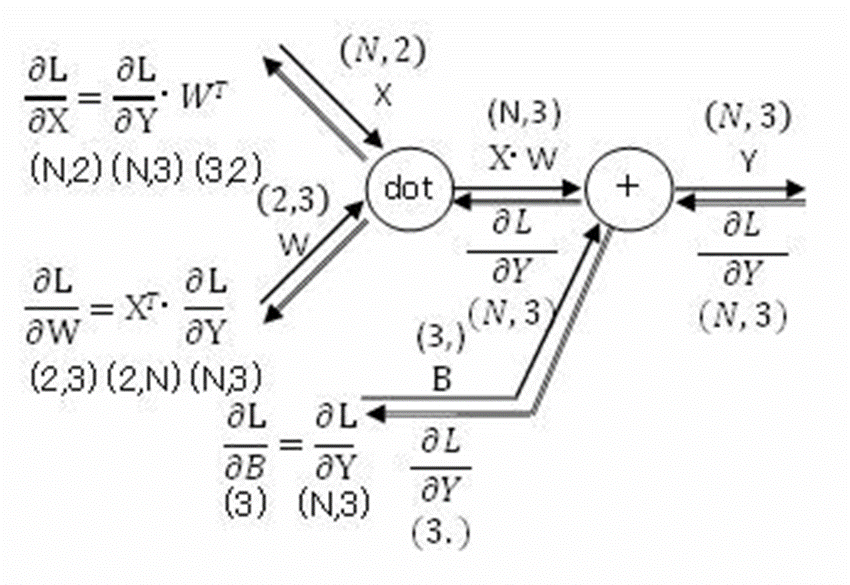

In [ ]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

#softmax with lossレイヤ
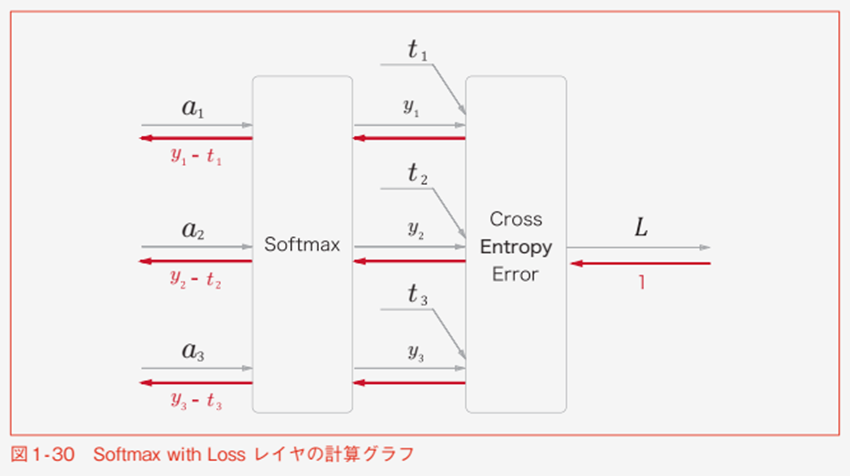

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmaxの出力
        self.t = None  # 教師ラベル

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 教師ラベルがone-hotベクトルの場合、正解のインデックスに変換
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx

#SGD

In [ ]:
class SGD:
    '''
    確率的勾配降下法（Stochastic Gradient Descent）
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]


#スパイラルデータセット

分類するクラスが3つあり, 直線によって分離できないことがわかる.  
そこで非線形な分離線をニューラルネットワークは学習することが出来るかを実験する



<ipython-input-10-43965a282939>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=np.int)


x (300, 2)
t (300, 3)


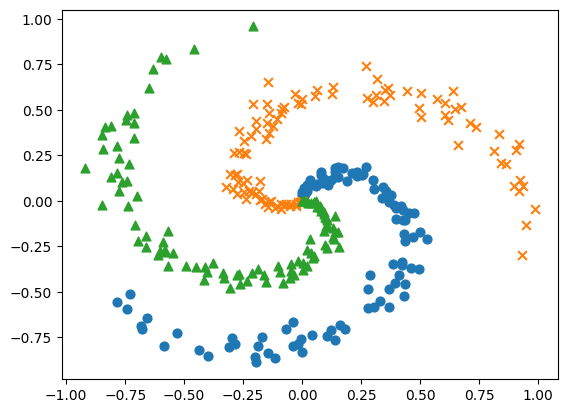

In [ ]:
import matplotlib.pyplot as plt

# coding: utf-8
import numpy as np


def load_data(seed=1984):
    np.random.seed(seed)
    N = 100  # クラスごとのサンプル数
    DIM = 2  # データの要素数
    CLS_NUM = 3  # クラス数

    x = np.zeros((N*CLS_NUM, DIM))
    t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=np.int)

    for j in range(CLS_NUM):
        for i in range(N):#N*j, N*(j+1)):
            rate = i / N
            radius = 1.0*rate
            theta = j*4.0 + 4.0*rate + np.random.randn()*0.2

            ix = N*j + i
            x[ix] = np.array([radius*np.sin(theta),
                              radius*np.cos(theta)]).flatten()
            t[ix, j] = 1

    return x, t


x, t = load_data()
print('x', x.shape)  # (300, 2)
print('t', t.shape)  # (300, 3)

# データ点のプロット
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

#ニューラルネットワークの実装
隠れ層が1つのニューラルネットワークを実装する

In [ ]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        # 重みとバイアスの初期化
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        # すべての重みと勾配をリストにまとめる
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

#学習

<ipython-input-10-43965a282939>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t = np.zeros((N*CLS_NUM, CLS_NUM), dtype=np.int)


| epoch 1 |  iter 10 / 10 | loss 1.13
| epoch 2 |  iter 10 / 10 | loss 1.13
| epoch 3 |  iter 10 / 10 | loss 1.12
| epoch 4 |  iter 10 / 10 | loss 1.12
| epoch 5 |  iter 10 / 10 | loss 1.11
| epoch 6 |  iter 10 / 10 | loss 1.14
| epoch 7 |  iter 10 / 10 | loss 1.16
| epoch 8 |  iter 10 / 10 | loss 1.11
| epoch 9 |  iter 10 / 10 | loss 1.12
| epoch 10 |  iter 10 / 10 | loss 1.13
| epoch 11 |  iter 10 / 10 | loss 1.12
| epoch 12 |  iter 10 / 10 | loss 1.11
| epoch 13 |  iter 10 / 10 | loss 1.09
| epoch 14 |  iter 10 / 10 | loss 1.08
| epoch 15 |  iter 10 / 10 | loss 1.04
| epoch 16 |  iter 10 / 10 | loss 1.03
| epoch 17 |  iter 10 / 10 | loss 0.96
| epoch 18 |  iter 10 / 10 | loss 0.92
| epoch 19 |  iter 10 / 10 | loss 0.92
| epoch 20 |  iter 10 / 10 | loss 0.87
| epoch 21 |  iter 10 / 10 | loss 0.85
| epoch 22 |  iter 10 / 10 | loss 0.82
| epoch 23 |  iter 10 / 10 | loss 0.79
| epoch 24 |  iter 10 / 10 | loss 0.78
| epoch 25 |  iter 10 / 10 | loss 0.82
| epoch 26 |  iter 10 / 10 | loss 

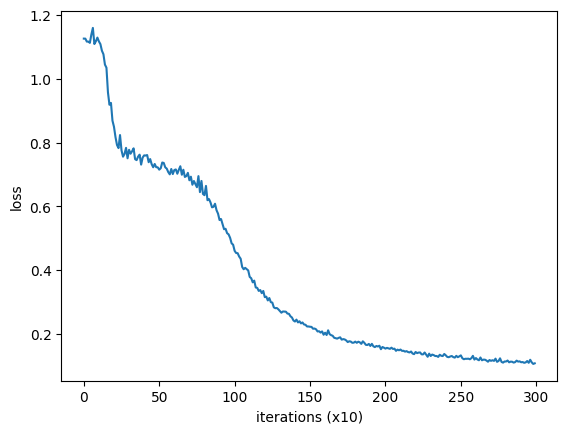

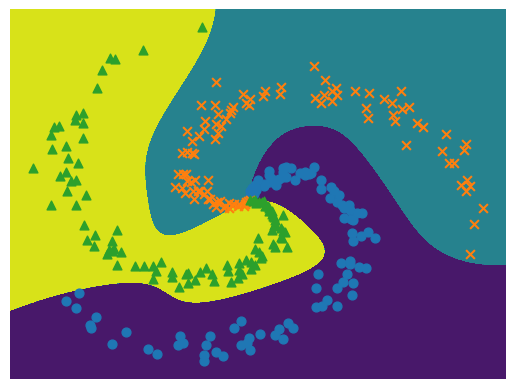

In [ ]:
# ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # データのシャッフル
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 勾配を求め、パラメータを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 定期的に学習経過を出力
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d |  iter %d / %d | loss %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


# 学習結果のプロット
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

# 境界領域のプロット
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# データ点のプロット
x, t = load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()